In [1]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### === Setting ===

In [2]:
zip_path = "Pizza+Place+Sales.zip"
extract_dir = "pizza_sales_data"

#### === Extract Zip ===

In [3]:
# === 1. Extract Zip ===
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

#### === Load CSV files ===

In [4]:
# === 2. Load CSV files ===
data_path = os.path.join(extract_dir, "pizza_sales")
orders = pd.read_csv(os.path.join(data_path, "orders.csv"))
order_details = pd.read_csv(os.path.join(data_path, "order_details.csv"))
pizzas = pd.read_csv(os.path.join(data_path, "pizzas.csv"))
pizza_types = pd.read_csv(os.path.join(data_path, "pizza_types.csv"), encoding='ISO-8859-1') 
#CSV file pizza_types.csv contains characters that are not encoded in UTF-8,which is the default encoding used by pandas.read_csv.

##### === Preprocess Data ===

In [5]:
orders['date'] = pd.to_datetime(orders['date'])
orders['time'] = pd.to_datetime(orders['time'], format='%H:%M:%S').dt.time

In [6]:
# Merge all datasets 
merged_df = order_details.merge(pizzas, on='pizza_id') \
                         .merge(orders, on='order_id') \
                         .merge(pizza_types, on='pizza_type_id')

In [7]:
# Add revenue column
merged_df['total_price'] = merged_df['quantity'] * merged_df['price']

#### === ANALYSIS ===

In [8]:
#1. Total Revenue 
print(f"1. Total Revenue: ${merged_df['total_price'].sum():,.2f}")

1. Total Revenue: $817,860.05


In [9]:
#2. Total Quantity Sold 
print(f"2. Total Quantity Sold: {merged_df['quantity'].sum()}")

2. Total Quantity Sold: 49574


In [10]:
#3. Total Orders 
print(f"3. Total Orders: {orders['order_id'].nunique()}")

3. Total Orders: 21350


In [11]:
#4. Pizza Types 
print(f"4. Unique Pizza Types: {pizza_types['pizza_type_id'].nunique()}")

4. Unique Pizza Types: 32


In [12]:
#5. Average Pizza Price 
print(f"5. Average Pizza Price: ${pizzas['price'].mean():.2f}")

5. Average Pizza Price: $16.44


In [13]:
#6. Peak Sales Hours 
orders['hour'] = pd.to_datetime(orders['time'], format='%H:%M:%S').dt.hour
hourly_sales = merged_df.groupby(orders['hour'])['total_price'].sum()
print(f"6. Peak Sales Hour: {hourly_sales.idxmax()}")

6. Peak Sales Hour: 12.0


In [14]:
#7. Sales by Day of Week 
orders['day_of_week'] = orders['date'].dt.day_name()
weekly_sales = merged_df.groupby(orders['day_of_week'])['total_price'].sum()
print("\n7. Sales by Day of Week:")
print(weekly_sales.sort_values(ascending=False))
print(f"Top Day: {weekly_sales.idxmax()}")


7. Sales by Day of Week:
day_of_week
Friday       59735.00
Thursday     54586.95
Saturday     53367.00
Wednesday    50910.90
Tuesday      50002.30
Monday       46479.90
Sunday       44146.50
Name: total_price, dtype: float64
Top Day: Friday


In [15]:
#8. Top 5 Bestselling Prizzas
top_5_pizzas = merged_df.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False).head(5)
print("\n8. Top 5 Bestselling Pizzas:")
print(top_5_pizzas)


8. Top 5 Bestselling Pizzas:
pizza_id
big_meat_s       1914
thai_ckn_l       1410
five_cheese_l    1409
four_cheese_l    1316
classic_dlx_m    1181
Name: quantity, dtype: int64


In [16]:
# 9. Monthly Sales
merged_df['month'] = merged_df['date'].dt.month_name()
monthly_sales = merged_df.groupby('month')['total_price'].sum()
print("\n9. Monthly Sales:")
print(monthly_sales.sort_values(ascending=False))


9. Monthly Sales:
month
July         72557.90
May          71402.75
March        70397.10
November     70395.35
January      69793.30
April        68736.80
August       68278.25
June         68230.20
February     65159.60
December     64701.15
September    64180.05
October      64027.60
Name: total_price, dtype: float64


In [17]:
# 10. Underperforming Pizza types
low_sales_types = merged_df.groupby('pizza_type_id')['total_price'].sum().sort_values().head()
print("\n10. Bottom 5 Pizza Types by Sales:")
print(low_sales_types)


10. Bottom 5 Pizza Types by Sales:
pizza_type_id
brie_carre      11588.50
green_garden    13955.75
spinach_supr    15277.75
mediterraneo    15360.50
spin_pesto      15596.00
Name: total_price, dtype: float64


#### === Visualizations ===

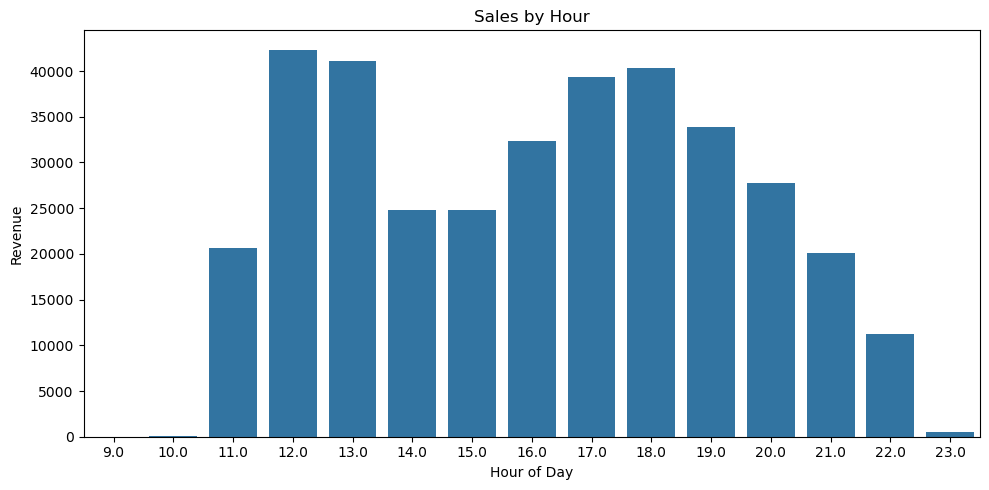

In [20]:
# Visualization of Sales by Hour
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title("Sales by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

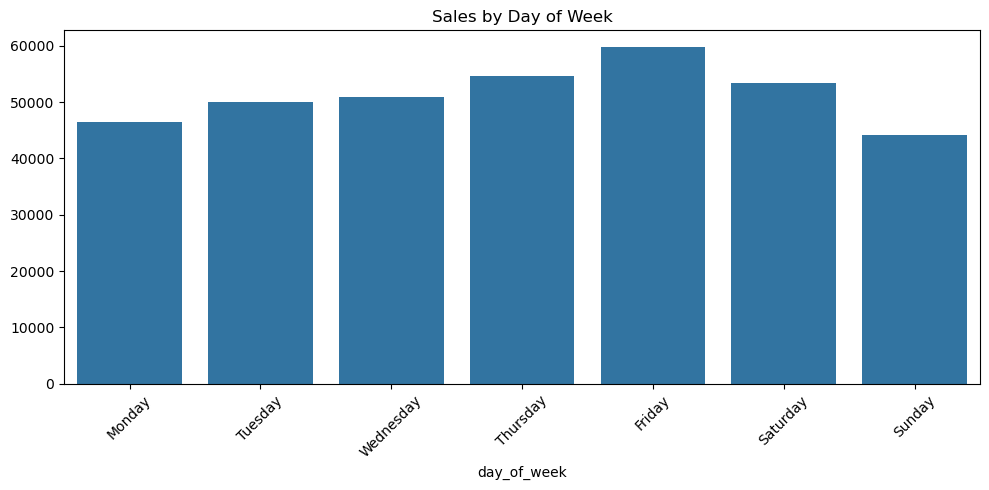

In [19]:
plt.figure(figsize=(10, 5))
weekly_sales = weekly_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=weekly_sales.index, y=weekly_sales.values)
plt.title("Sales by Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()